In [18]:
import pandas as pd
import numpy as np

In [27]:
non_opt=pd.read_csv("no_optimise.csv")
non_opt.head()

,number of elements,time1,time2,time3,time4
0,500,0.000396,0.000363,0.000360,0.000454
1,1000,0.000958,0.000926,0.000843,0.000683
2,1500,0.000992,0.000939,0.000933,0.000951
3,2000,0.001308,0.001303,0.001312,0.001146
4,2500,0.001156,0.001674,0.001792,0.001971


In [28]:
non_opt["time_mid"]=(non_opt["time1"]+non_opt["time2"]+non_opt["time3"]+non_opt["time4"])/4

In [33]:
k,a=np.polyfit(non_opt["number of elements"], non_opt["time_mid"], 1)

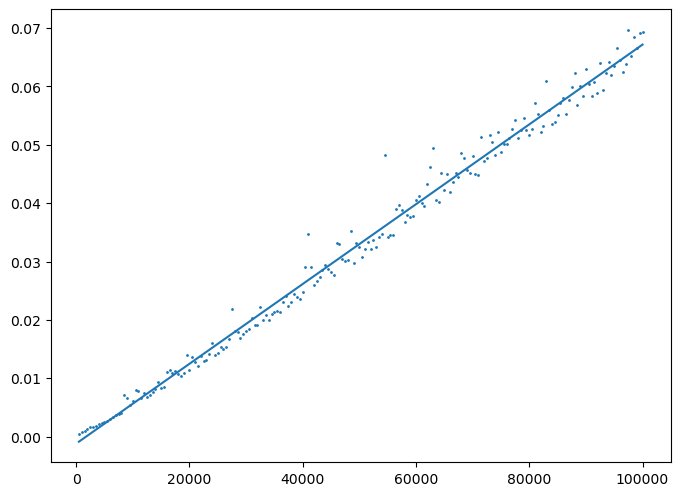

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=100) # размер графика
#plt.ylabel("$T$, с") # подписи к осям
#plt.xlabel("$a$, см")
#plt.xlim([0, 40])
#plt.grid(True, linestyle="--") # пунктирная сетка
plt.scatter(non_opt["number of elements"], non_opt["time_mid"], s=1) # точки с погрешностями
plt.plot(non_opt["number of elements"], k*non_opt["number of elements"]+a,) # интерполяция
#plt.legend() # легенда
plt.show()

In [30]:
non_opt["ln_num"]=non_opt["number of elements"]*np.log(non_opt["number of elements"])
non_opt

,number of elements,time1,time2,time3,time4,time_mid,ln_num
0,500,0.000396,0.000363,0.000360,0.000454,0.000393,3.107304e+03
1,1000,0.000958,0.000926,0.000843,0.000683,0.000853,6.907755e+03
2,1500,0.000992,0.000939,0.000933,0.000951,0.000954,1.096983e+04
3,2000,0.001308,0.001303,0.001312,0.001146,0.001267,1.520180e+04
4,2500,0.001156,0.001674,0.001792,0.001971,0.001648,1.956012e+04
...,...,...,...,...,...,...,...
195,98000,0.065413,0.064710,0.064849,0.066221,0.065298,1.126287e+06
196,98500,0.066434,0.064462,0.073977,0.069098,0.068493,1.132534e+06
197,99000,0.066137,0.064038,0.066700,0.069366,0.066560,1.138785e+06
198,99500,0.071020,0.069308,0.070335,0.066154,0.069204,1.145037e+06


In [39]:
k1,a1=np.polyfit(non_opt["ln_num"], non_opt["time_mid"], 1)

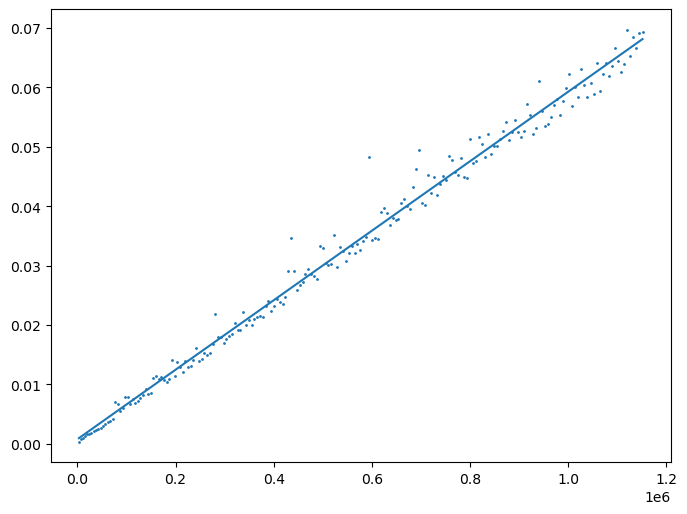

In [41]:
plt.figure(figsize=(8,6), dpi=100) # размер графика
plt.scatter(non_opt["ln_num"], non_opt["time_mid"], s=1) # точки с погрешностями
plt.plot(non_opt["ln_num"], k1*non_opt["ln_num"]+a1)
plt.show()

Optimised:

In [46]:
opt=pd.read_csv("optimised.csv")
opt

,number of elements,time1,time2,time3,time4
0,10000,0.004567,0.004643,0.004672,0.004565
1,20000,0.010721,0.009856,0.009814,0.009893
2,30000,0.016580,0.021460,0.020430,0.017774
3,40000,0.021112,0.021258,0.021269,0.020925
4,50000,0.034825,0.028344,0.030107,0.033338
5,60000,0.044550,0.036774,0.035431,0.041248
6,70000,0.051075,0.040760,0.040212,0.040390
7,80000,0.046769,0.050352,0.045017,0.044940
8,90000,0.060374,0.051384,0.059949,0.054224
9,100000,0.062310,0.062505,0.060552,0.060700


In [47]:
opt["time_mid"]=(opt["time1"]+opt["time2"]+opt["time3"]+opt["time4"])/4

In [48]:
opt[opt["number of elements"]==10000]

,number of elements,time1,time2,time3,time4,time_mid
0,10000,0.004567,0.004643,0.004672,0.004565,0.004612


In [49]:
non_opt[non_opt["number of elements"]==10000]

,number of elements,time1,time2,time3,time4,time_mid,ln_num
19,10000,0.005424,0.005398,0.006117,0.007396,0.006084,92103.40372


In [51]:
opt["ln_num"]=opt["number of elements"]*np.log(opt["number of elements"])

In [52]:
k2,a2=np.polyfit(opt["ln_num"], opt["time_mid"], 1)

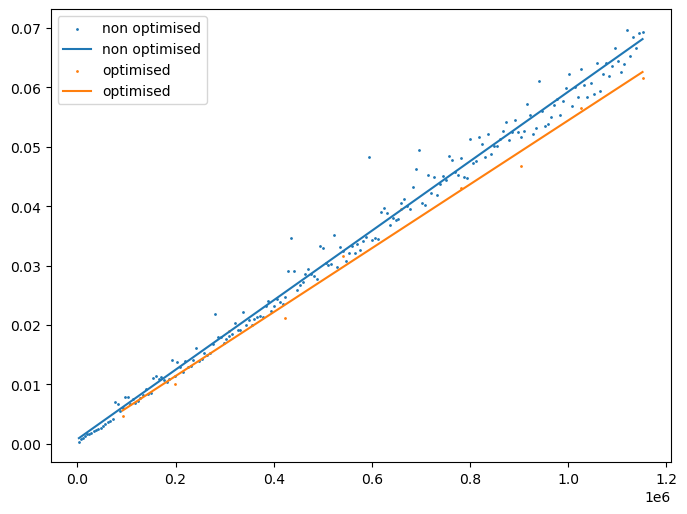

In [55]:
plt.figure(figsize=(8,6), dpi=100) # размер графика
plt.scatter(non_opt["ln_num"], non_opt["time_mid"], s=1,label="non optimised") # точки с погрешностями
plt.plot(non_opt["ln_num"], k1*non_opt["ln_num"]+a1,label="non optimised")
plt.scatter(opt["ln_num"], opt["time_mid"], s=1, label="optimised") # точки с погрешностями
plt.plot(opt["ln_num"], k2*opt["ln_num"]+a2, label="optimised")
plt.legend()
plt.show()